## Advanced ML. Домашнее задание 1.

Advanced ML: Домашнее задание 1
Первое небольшое ДЗ: два вопроса и одно задание. Смысл задания в том, чтобы посмотреть на ваши околовероятностные рассуждения в ситуациях, когда вероятностная модель сама по себе очень простая, но её надо правильно построить, правильно отобразить в неё жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы. В третьем в качестве ответа ожидается jupyter-ноутбук, так что предлагаю прямо в нём текстом написать ответы и на первые два вопроса; LaTeX в jupyter работает на вполне достаточном для нас уровне. Итого в качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для пользователя snikolenko).


### 1 вопрос. 

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови! Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

#### Ответ:

Введём обозначения: 
* $G$ - (guilty) виновность 
* $B$ - (blood) наличие у подозреваемого той самой редкой группы с места преступления 

Формализуем условия вопроса:
1. $P(B | G) = 1$ - кровь с вероятностью 1 принадлежит убийце
2. $P(\neg G | B) =0.01$ - “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%". Прокурор корректно оценил вероятность вероятность невиновного иметь данную группу крови.
3. $P(G | B) = 1 - P(\neg G | B)$ - "значит, с вероятностью 99% он виновен, предлагаю осудить”. В этом прокурор не прав. 

Прокурор должен был оценить
1. вероятность виновности подсудимого при условии наличия у него группы крови с места преступления $P(G | B)$ :

$P(G|B) = \frac{P(B|G)P(G)}{P(B)}=
\frac{1 * P(G)}{P(B|G)P(G) + P(B|\neg{G})P(\neg{G})} =
\frac{P(G)}{1 *P(G) + 0.01(1 - P(G))} = 
\frac{P(G)}{0.01 + 0.99P(G)}
$

2. Априорную вероятность виновности подозреваемого $P(G)$ по обстоятельствам, не связанным с результатом анализа крови. Например по наличию мотива. Так же априрную вероятность можно оценить по истории обвинительных судебных прецедентов для подсудимых с аналогичными признаками (возраст, пол, гражданство, образование итд).




### 2 вопрос. 

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

#### Ответ:

Формализуем условия вопроса:
1. $P(B | G) = 1$ - кровь с вероятностью 1 принадлежит убийце
2. $1 - P(B|\neg G) =0.0001$ - “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%.". Адвокат не прав в том, что оценивает вероятность наличия у подозреваемого группы крови с места преступления при условии невиновности почти всей популяции с данной группой, а должен оценить условную вероятность невиновности при наличии у подсудимого данной группы крови. 

Адвокат должен был оценить
1. вероятность невиновности подсудимого при условии наличия у него группы крови с места преступления $P(\neg G | B)$ :

$P(\neg G|B) = \frac{P(B|\neg G)P(\neg G)}{P(B)}=
\frac{0.9999P(\neg G)}{P(B|G)P(G) + P(B|\neg{G})P(\neg{G})} =
\frac{0.9999P(\neg G)}{1 *P(G) + 0.01(1 - P(G))} = 
\frac{0.9999P(\neg G)}{0.01 + 0.99P(G)} = \frac{0.9999P(\neg G)}{1 - 0.99P(\neg G)} 
$

2. априорную вероятность невиновности $P(\neg G)$ по обстоятельствам, не связанным с результатом анализа крови. Например по наличию алиби.

#### Ответ:

### 3. вопрос. 

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%. Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного). Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

#### Решение:

* T - (test) результат тестирования положительный
* I - (ill) человек болеет 
* $P(T|\neg I)$ - FP (false positive)
* $P(\neg T|I)$ - FN (false negative)
* $P(I|T)$  - болен при положительном тесте
* $P(I|\neg T)$ - болен при отрицательном тесте

$
P(I|T) = \frac{P(T|I)P(I)}{P(T|I)P(I) + P(T|\neg I)P(\neg I)} = \frac{0.01(1 - P(FN))}{0.01(1 - P(FN)) + 0.99 P(FP)}
$
$
P(I|\neg T) = \frac{P(\neg T|I)P(I)}{P(\neg T|I)P(I) + P(\neg T|\neg I)P(\neg I)} = \frac{0.01 P(FN)}{0.01 P(FN) + 0.99 (1 - P(FP))} 
$

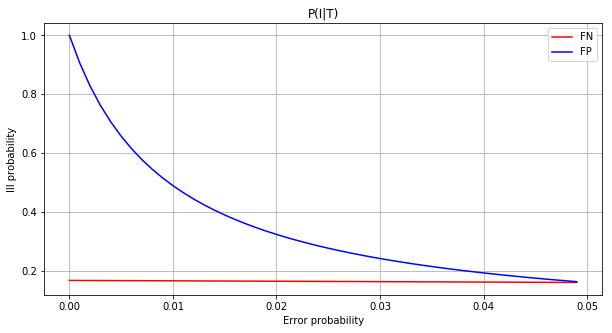

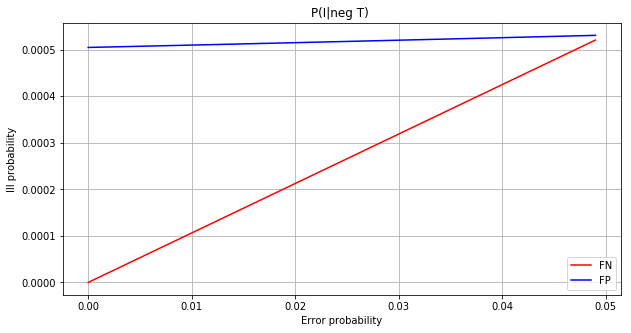

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def posterior_I_T_pos(FN, FP):
    return ((1-FN)*0.01)/((1-FN)*0.01+FP*0.99)

def posterior_T_T_neg(FN, FP):
    return (FN*0.01)/((1-FP)*0.99+FN*0.01)

errors = np.arange(0, 0.05, 0.001)

plt.figure(figsize=(10,5))
plt.plot(errors, [posterior_I_T_pos(e, 0.05) for e in errors], color='r', label='FN')
plt.plot(errors, [posterior_I_T_pos(0.05, e) for e in errors], color='b', label='FP')
plt.legend()
plt.grid()
plt.title('P(I|T)')
plt.xlabel('Error probability')
plt.ylabel('Ill probability')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(errors, [posterior_T_T_neg(e, 0.05) for e in errors] , color='r', label='FN')
plt.plot(errors, [posterior_T_T_neg(0.05, e) for e in errors], color='b', label='FP')
plt.legend()
plt.grid()
plt.title('P(I|neg T) ')
plt.xlabel('Error probability')
plt.ylabel('Ill probability')
plt.show()

Оценим количественно на популяции 100 000 человек, уменьшая FN, FP ошибки до 0.01

In [8]:
#Уменьшили FP до 0.01
print((posterior_I_T_pos(0.05, 0.01)-posterior_I_T_pos(0.05, 0.05))*100000)

32867.37724969422


In [9]:
#Уменьшили FN до 0.01
print((posterior_T_T_neg(0.05, 0.05)-posterior_T_T_neg(0.01, 0.05))*100000)

42.50345100454795


#### Уменьшили FP до 0.01
на 32 тысячи меньше FP (!)
#### Уменьшили FN до 0.01
на 42 меньше FN 

Наилучшую стратегию можно выбрать имея оценки потенциальных потерь для ошибок FP и FN.

В случае FN основной риск - отпустить заражённого. Стоимость риска высока при высокой контагиозности. 

В случае FP основной риск - трата ресурсов лечения и изоляции на здорового человека. Уменьшив ошибку можно разгрузить больницы.


Оптимальной будет оценка при которой риски, взвешенные на доли ошибок минимальны. 

Не зная оценок потерь, умозрительно, кажется, что нужно уменьшать FP, так как количественный эффект от уменьшения FP подавляющий.